In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df =pd.read_csv("drive/My Drive/Data Mining_Research Paper/Dataset/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [ ]:
df.shape

(1259, 27)

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower()

In [ ]:
df.isna().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
df['country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [ ]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [ ]:
df = df.drop(['country','state','timestamp','comments','no_employees'], axis = 1)

In [ ]:
df['self_employed'].unique()
df['self_employed'].mode()
df['self_employed'] = df['self_employed'].fillna('No')

In [ ]:
df['work_interfere'].unique()
df['work_interfere'].mode()
df['work_interfere'] = df['work_interfere'].fillna('Sometimes')

In [ ]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [ ]:
df.isna().sum()

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
df['gender'] = df['gender'].apply(encode_gender)

In [ ]:
df['gender'].value_counts()

1    988
0    244
2     27
Name: gender, dtype: int64

In [ ]:
df['age']

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: age, Length: 1259, dtype: int64

In [ ]:
health = df.copy()
health.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
plt.figure(figsize=(1,4))
px.histogram(health, x = 'treatment',color='treatment')

<Figure size 72x288 with 0 Axes>

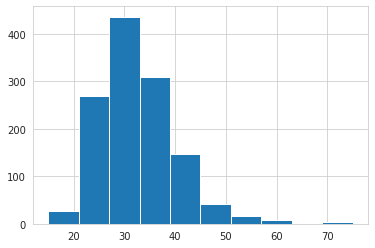

In [ ]:
df.loc[df.age<12,'age']=15
df.loc[df.age>75,'age']=75

df['age'].hist()

In [ ]:
px.histogram(df, x = 'age' , color = 'treatment' )

In [ ]:
px.histogram(health, x = 'self_employed',color='treatment',barmode='group')

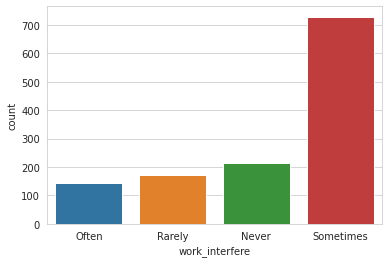

In [ ]:
sns.countplot(data = health , x = 'work_interfere')

In [ ]:
px.histogram(health, x = 'work_interfere',color='treatment',barmode='group')  

In [ ]:
px.histogram(health, x = 'family_history',color='treatment',barmode='group')

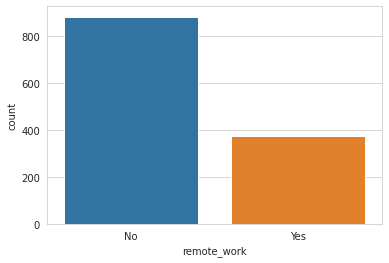

In [ ]:
sns.countplot(data = health , x = 'remote_work')

In [ ]:
px.histogram(health, x = 'remote_work',color='treatment',barmode='group')

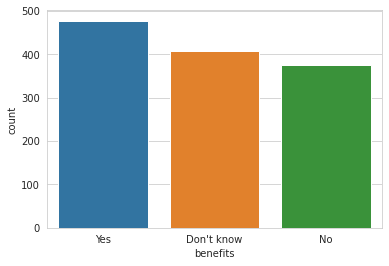

In [ ]:
sns.countplot(data = health , x = 'benefits')

In [ ]:
px.histogram(health, x = 'benefits',color='treatment',barmode='group')

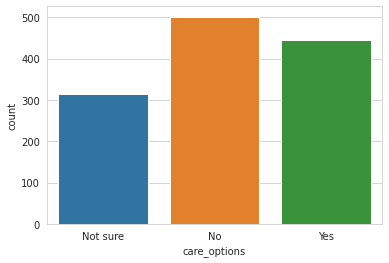

In [ ]:
sns.countplot(data = health , x = 'care_options')

In [ ]:
px.histogram(health, x = 'care_options',color='treatment',barmode='group')

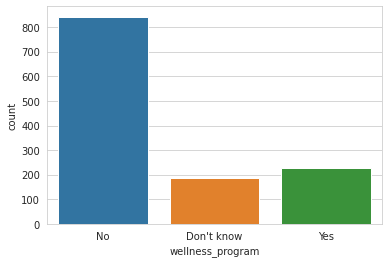

In [ ]:
sns.countplot(data = health , x = 'wellness_program')

In [ ]:
px.histogram(health, x = 'wellness_program',color='treatment',barmode='group')

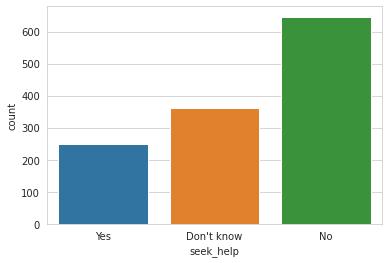

In [ ]:
sns.countplot(data = health , x = 'seek_help')

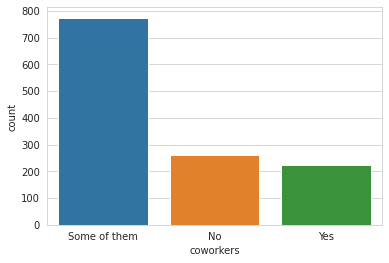

In [ ]:
sns.countplot(data = health , x = 'coworkers' )

In [ ]:
px.histogram(health, x = 'coworkers',color='treatment',barmode='group')

In [ ]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
]

nominal_features = [
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [ ]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
]

nominal_prefixes = [
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [ ]:
df = binary_encode(
    df,
    columns=binary_features,
    positive_values=binary_positive_values
)

df = ordinal_encode(
    df,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

df = onehot_encode(
    df,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [ ]:
df.head()

,age,gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,re_Don't know,re_No,re_Yes,be_No,be_Not sure,be_Yes,ca_Don't know,ca_No,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_Somewhat difficult,an_Somewhat easy,an_Very difficult,an_Very easy,le_Maybe,le_No,le_Yes,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0


In [ ]:
y = df['treatment'].copy()
X = df.drop('treatment', axis=1).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
features = list(X_train.columns)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train[features] = std_scaler.fit_transform(X_train)

In [ ]:
X_train

,age,gender,self_employed,family_history,work_interfere,remote_work,tech_company,obs_consequence,re_Don't know,re_No,re_Yes,be_No,be_Not sure,be_Yes,ca_Don't know,ca_No,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_Somewhat difficult,an_Somewhat easy,an_Very difficult,an_Very easy,le_Maybe,le_No,le_Yes,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
98,0.096931,2.723105,-0.37181,-0.811871,0.404012,-0.647055,0.476466,-0.417931,-0.686137,1.566813,-0.800372,-0.808027,-0.566427,1.327311,-0.429115,0.714947,-0.472875,-0.652354,1.001136,-0.503190,0.722211,-0.215217,-0.652354,-0.918203,-0.343541,2.008553,-0.296065,-0.432818,1.255398,-0.783296,-0.548935,-0.527887,0.606640,-0.232008,-0.496095,0.779528,-0.469278,1.434931,-0.608391,-0.821526,-0.425400,0.488978,-0.203399,1.099100,-0.798465,-0.432818,-0.916105,1.648423,-0.61540
928,-0.970524,0.384844,-0.37181,-0.811871,0.404012,1.545465,0.476466,-0.417931,-0.686137,-0.638238,1.249418,1.237582,-0.566427,-0.753403,-0.429115,0.714947,-0.472875,-0.652354,1.001136,-0.503190,-1.384637,-0.215217,1.532909,1.089084,-0.343541,-0.497871,-0.296065,-0.432818,-0.796560,1.276656,-0.548935,-0.527887,0.606640,-0.232008,-0.496095,-1.282827,2.130934,-0.696897,-0.608391,1.217247,2.350729,-2.045080,-0.203399,1.099100,-0.798465,-0.432818,1.091578,-0.606640,-0.61540
948,0.363795,0.384844,-0.37181,-0.811871,0.404012,-0.647055,0.476466,-0.417931,-0.686137,-0.638238,1.249418,-0.808027,-0.566427,1.327311,2.330377,-1.398705,-0.472875,-0.652354,-0.998866,1.987319,0.722211,-0.215217,-0.652354,-0.918203,-0.343541,-0.497871,3.377640,-0.432818,1.255398,-0.783296,-0.548935,1.894345,-1.648423,-0.232008,-0.496095,0.779528,-0.469278,-0.696897,1.643679,-0.821526,-0.425400,0.488978,-0.203399,-0.909836,1.252403,-0.432818,1.091578,-0.606640,-0.61540
831,1.030954,0.384844,-0.37181,-0.811871,-1.834571,-0.647055,0.476466,-0.417931,-0.686137,-0.638238,1.249418,-0.808027,1.765452,-0.753403,-0.429115,0.714947,-0.472875,1.532909,-0.998866,-0.503190,0.722211,-0.215217,-0.652354,1.089084,-0.343541,-0.497871,-0.296065,-0.432818,1.255398,-0.783296,-0.548935,-0.527887,0.606640,-0.232008,-0.496095,0.779528,-0.469278,-0.696897,1.643679,-0.821526,-0.425400,0.488978,-0.203399,1.099100,-0.798465,-0.432818,1.091578,-0.606640,-0.61540
737,0.096931,0.384844,-0.37181,-0.811871,0.404012,-0.647055,0.476466,-0.417931,1.457434,-0.638238,-0.800372,-0.808027,1.765452,-0.753403,-0.429115,0.714947,-0.472875,-0.652354,1.001136,-0.503190,0.722211,-0.215217,-0.652354,1.089084,-0.343541,-0.497871,-0.296065,-0.432818,1.255398,-0.783296,-0.548935,-0.527887,0.606640,-0.232008,-0.496095,0.779528,-0.469278,1.434931,-0.608391,-0.821526,-0.425400,0.488978,-0.203399,1.099100,-0.798465,-0.432818,1.091578,-0.606640,-0.61540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.897523,0.384844,-0.37181,-0.811871,0.404012,1.545465,0.476466,-0.417931,-0.686137,-0.638238,1.249418,1.237582,-0.566427,-0.753403,-0.429115,0.714947,-0.472875,-0.652354,1.001136,-0.503190,0.722211,-0.215217,-0.652354,1.089084,-0.343541,-0.497871,-0.296065,-0.432818,-0.796560,-0.783296,1.821710,1.894345,-1.648423,-0.232008,2.015743,-1.282827,-0.469278,1.434931,-0.608391,-0.821526,-0.425400,0.488978,-0.203399,-0.909836,1.252403,-0.432818,1.091578,-0.606640,-0.61540
53,-0.036501,0.384844,-0.37181,-0.811871,-1.834571,1.545465,0.476466,-0.417931,1.457434,-0.638238,-0.800372,-0.808027,1.765452,-0.753403,-0.429115,0.714947,-0.472875,-0.652354,1.001136,-0.503190,0.722211,-0.215217,-0.652354,1.089084,-0.343541,-0.497871,-0.296065,-0.432818,1.255398,-0.783296,-0.548935,-0.527887,0.606640,-0.232008,-0.496095,0.779528,-0.469278,-0.696897,-0.608391,1.217247,-0.425400,0.488978,-0.203399,-0.909836,1.252403,-0.432818,1.091578,-0.60664

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y_train = lb_encoder.fit_transform(y_train)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    f1_train = f1_score(y_train,y_pred)

    #Cross validation
    f1_val = cross_val_score(model,X_train,y_train,scoring='f1',cv=10)
    
    # returning the scores
    score = pd.DataFrame({'Name' : name ,'F1_score_trainset' : [f1_train], 'F1_score_validationset' : [f1_val.mean()]})
    print(f"Accuracy: {accuracy_score(y_train, y_pred, normalize=True)}")
    return score

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear')
train_evaluate(log_reg,X_train,y_train,'Logistic Regression')

Accuracy: 0.7423382519863791


,Name,F1_score_trainset,F1_score_validationset
0,Logistic Regression,0.738178,0.711614


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4,random_state=42)
train_evaluate(dt_clf,X_train,y_train,'DecisionTreeClassifier')

Accuracy: 0.7162315550510783


,Name,F1_score_trainset,F1_score_validationset
0,DecisionTreeClassifier,0.699519,0.697966


In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
train_evaluate(svc_clf,X_train,y_train,'Support Vector Classifier')

Accuracy: 0.8626560726447219


,Name,F1_score_trainset,F1_score_validationset
0,Support Vector Classifier,0.859791,0.691129


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
train_evaluate(knn,X_train, y_train,'K Neighbors Classifier')

Accuracy: 0.7673098751418842


,Name,F1_score_trainset,F1_score_validationset
0,K Neighbors Classifier,0.747226,0.600202


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

train_evaluate(gnb,X_train, y_train,'Naive Bayes Claasifier')

Accuracy: 0.7014755959137344


,Name,F1_score_trainset,F1_score_validationset
0,Naive Bayes Claasifier,0.689492,0.659284
